# Carga un dataset de la libreria `pydataset` 

Puedes elegir la que más te guste! 

Hint: ten en cuenta que os pediremos que hagais algunas transformaciones usando `apply` y `groupby`! 

In [1]:
#import de todas las librerias a utilizar en el codigo:

from pydataset import data
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import random
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

In [2]:
#prueba uso datasets en libreria pydataset - no sera el dataset utilizado:

datasets = data()
datasets.sample(5)
df_politicalKnowledge = data("politicalKnowledge")
df_politicalKnowledge.head(5)

,country,DomesticKnowledge.hs,DomesticKnowledge.sc,DomesticKnowledge.c,InternationalKnowledge.hs,InternationalKnowledge.sc,InternationalKnowledge.c,PoliticalKnowledge.hs,PoliticalKnowledge.sc,PoliticalKnowledge.c,PublicMediaPerCapita,PublicMediaRel2US
1,Denmark,0.77,0.79,0.77,0.65,0.67,0.65,0.71,0.730,0.710,101.00,74.81
2,Finland,0.74,0.75,0.85,0.56,0.69,0.70,0.65,0.720,0.775,101.00,74.81
3,UK,0.62,0.65,0.72,0.52,0.54,0.68,0.57,0.595,0.700,80.00,59.26
4,US,0.40,0.61,0.77,0.22,0.42,0.65,0.31,0.515,0.710,1.35,1.00


In [3]:
#creación de dataframe "Bitcoin Historical Data" - Jan 2012 to March 2021:

raw_data = pd.read_csv("/Users/fernandoseguias/Desktop/ferseg/Proyectos/Programacion/iron_hack/data_sets/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
raw_data.sample(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1895143,1439414820,269.24,269.56,269.24,269.56,5.353500,1441.561408,269.274570
3621233,1542980220,4241.95,4247.30,4241.78,4247.30,1.453514,6170.351033,4245.126164
1444317,1411976940,372.65,372.65,372.50,372.50,4.005674,1492.184900,372.517806
619280,1362474720,40.20,40.20,40.20,40.20,0.389730,15.667146,40.200000
1404013,1409558700,480.31,481.09,480.31,481.09,11.172184,5370.660189,480.717132
1539123,1417665300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
879277,1378074540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4592135,1601234340,10737.00,10737.00,10737.00,10737.00,0.017513,188.037188,10737.000000
3586895,1540919940,6263.75,6263.75,6263.75,6263.75,0.251996,1578.439945,6263.750000
2746341,1490486700,962.47,962.47,962.47,962.47,0.005200,5.004844,962.470000


# Explora el dataset elegido 

- Cuantas columnas tenemos
- Cuantos nulos
- Haz una descripción
- ¿Puedes homogeneizar el nombre de las columnas?

Tómate tu tiempo para entender el dataframe y la información que hay en el. Y escribe brevemente las conclusiones principales de el dataset elegido. 

**No te olvides de guardar tu nuevo csv limpio**

In [4]:
#numero de columnas:

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [5]:
raw_data.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

In [6]:
#cantidad de datas nulos expresado porcentualmente:

raw_data.isnull().sum() * 100 / raw_data.shape[0]

Timestamp             0.00000
Open                 25.60246
High                 25.60246
Low                  25.60246
Close                25.60246
Volume_(BTC)         25.60246
Volume_(Currency)    25.60246
Weighted_Price       25.60246
dtype: float64

In [7]:
#eliminamos la columna Weighted_Price por no considerarla relevante ahora:

df_bitcoin_inicial = raw_data.drop(["Weighted_Price"], axis = 1)

# Crea alguna función y aplícala a tu dataframe usando `apply`

In [8]:
#funcion para cambiar los datos de la columna Timestamp a formato fecha AAAA-MM-DD HH:MM:SS:

def fecha(timestamp):
    date_time = datetime.datetime.fromtimestamp(timestamp)
    return str(date_time)

#funcion para determinar la hora en una nueva columna (para filtrar los datos por las 00:00:00 - 1 valor por dia):

def limpiar_hora(x):
    hora =  datetime.datetime.strptime(x.split(" ")[1], '%H:%M:%S')
    return str(hora)

#funcion para determinar el año en una nueva columna:

def limpiar_year(x):
    hora = str(datetime.datetime.strptime(x.split(" ")[0], '%Y-%m-%d'))[:4]
    return str(hora)

In [9]:
#agrego 3 columnas aplicando las funciones anteriores y despues filtro por dia:

df_bitcoin_inicial["Date_Time"] = df_bitcoin_inicial["Timestamp"].apply(fecha)
df_bitcoin_inicial["Time"] = df_bitcoin_inicial["Date_Time"].apply(limpiar_hora)
df_bitcoin_inicial["Year"] = df_bitcoin_inicial["Date_Time"].apply(limpiar_year)
df_bitcoin_diaria = df_bitcoin_inicial[df_bitcoin_inicial["Time"] == "1900-01-01 00:00:00"]

In [10]:
#utilizo como index la columna creada como Date y elimino Timestamp y Time por no necesitarlas mas:

df_bitcoin_diaria.set_index(["Date_Time"], inplace = True)
df_bitcoin_final = df_bitcoin_diaria.drop(["Timestamp"], axis = 1).drop(["Time"], axis = 1)

In [11]:
#filtro solo las lineas con data disponible (no NaN):

df_bitcoin = df_bitcoin_final.dropna()
df_bitcoin.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Year                 0
dtype: int64

In [12]:
df_bitcoin

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Year
Date_Time,,,,,,,
2012-03-02 00:00:00,5.00,5.00,5.00,5.00,22.940642,114.703210,2012
2012-03-20 00:00:00,4.88,4.88,4.83,4.83,25.000000,121.114835,2012
2012-03-25 00:00:00,4.83,4.83,4.83,4.83,165.800000,800.814000,2012
2012-04-21 00:00:00,5.37,5.38,5.37,5.38,14.771572,79.412737,2012
2012-05-31 00:00:00,5.13,5.13,5.13,5.13,62.649123,321.390000,2012
...,...,...,...,...,...,...,...
2021-03-27 00:00:00,54432.19,54432.19,54400.00,54401.93,0.900881,49016.946515,2021
2021-03-28 00:00:00,56398.45,56462.51,56398.45,56438.86,1.174930,66301.818508,2021
2021-03-29 00:00:00,55134.80,55173.57,55077.96,55077.96,6.100670,336340.525930,2021


# Aplica el conocimiento del groupby en tu dataframe y saca algunas conclusiones (practica el *story telling*)

**BONUS** Plotea algunas de las conclusiones que hayas podido extraer

In [13]:
#creo dos grupos, uno que contenga el valor maximo por cada año y el otro el valor minimo, posterioremente se concatenan para tener un df:

maximos = df_bitcoin.groupby(["Year"])["Close"].max()
minimos = df_bitcoin.groupby(["Year"])["Close"].min()

df_bitcoin_max_min = pd.concat([maximos, minimos], axis=1).reset_index()

#creo una lista para renombrar las columnas:

nuevas_col = ["Year", "ATH", "Dip"]
df_bitcoin_max_min.columns = nuevas_col

print(df_bitcoin_max_min)

   Year       ATH       Dip
0  2012     12.29      4.83
1  2013   1132.00     13.50
2  2014    915.00    298.99
3  2015    463.28    170.99
4  2016    972.98    367.37
5  2017  19310.66    788.34
6  2018  17069.99   3190.00
7  2019  12578.02   3362.78
8  2020  28728.12   4941.91
9  2021  61114.77  29086.47


In [14]:
#agrego la columna % max profit que representa el profit en el mejor escenario (comprar abajo, vender arriba):

df_bitcoin_max_min["% max profit"] = (df_bitcoin_max_min["ATH"] - df_bitcoin_max_min["Dip"]) / df_bitcoin_max_min["Dip"] * 100

df_bitcoin_max_min

,Year,ATH,Dip,% max profit
0,2012,12.29,4.83,154.451346
1,2013,1132.00,13.50,8285.185185
2,2014,915.00,298.99,206.030302
3,2015,463.28,170.99,170.939821
4,2016,972.98,367.37,164.850151
5,2017,19310.66,788.34,2349.534465
6,2018,17069.99,3190.00,435.109404
7,2019,12578.02,3362.78,274.036363
8,2020,28728.12,4941.91,481.316131
9,2021,61114.77,29086.47,110.114084


In [15]:
#juego del arrepentimiento:

df_juego = df_bitcoin.reset_index()

def tu_balance():
    inversion = float(input("Introduce tu inversión: "))
    linea_random = random.randint(0,2635)
    precio_random = df_juego.iloc[linea_random, 4]
    fecha_random = df_juego.iloc[linea_random, 0]
    balance_btc = inversion / precio_random
    balance_usd = balance_btc * 40000
    return print(f"Si hubieras invertido {inversion} el dia {fecha_random}, hoy tendrias {balance_usd} dolares")
    
tu_balance()

Introduce tu inversión: 1000
Si hubieras invertido 1000.0 el dia 2017-11-17 00:00:00, hoy tendrias 5122.944258524259 dolares


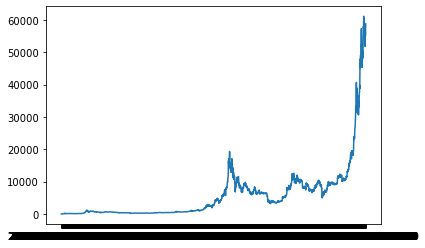

In [16]:
plt.plot(df_bitcoin["Close"])